<a href="https://colab.research.google.com/github/IlyaKo4atkov/My-machine-learning-projects/blob/main/%D0%9C%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D1%86%D0%B5%D0%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Условие задачи

## Используя датасет японских машин, обучить модель предсказывать цены на японские автомобили. Оценить качество работы нейронной сети, определить средний процент ошибки на проверочной выборке

**Примечание**. Подробную информацию о датасете можно узнать на портале соревновани [kaggle.com](https://www.kaggle.com/datasets/doaaalsenani/used-cars-dataets/data).



In [ ]:
#Загрузка датасета
!wget https://storage.yandexcloud.net/academy.ai/japan_cars_dataset.csv

--2024-10-19 09:40:13--  https://storage.yandexcloud.net/academy.ai/japan_cars_dataset.csv
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 136735 (134K) [text/csv]
Saving to: ‘japan_cars_dataset.csv’

japan_cars_dataset. 100%[===================>] 133.53K   197KB/s    in 0.7s    

2024-10-19 09:40:15 (197 KB/s) - ‘japan_cars_dataset.csv’ saved [136735/136735]



### Импорт необходимых библиотек

In [ ]:
# Для работы с массивами данных
import numpy as np

# Для работы с табличными данными
import pandas as pd

# Библиотека утилит
from keras import utils

# Для работы с моделями
from keras.models import Sequential, Model

# Слои
from keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation, Input, concatenate
from keras.layers import SimpleRNN, GRU, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D

# Оптимизаторы
from keras.optimizers import Adam, Adadelta, SGD, Adagrad, RMSprop

# Токенизатор
from tensorflow.keras.preprocessing.text import Tokenizer

# Нормализация данных
from sklearn.preprocessing import StandardScaler

# Регулярные выражения
import re

# Для работы с графиками
import matplotlib.pyplot as plt

# Метрики для расчета ошибок
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Для преобразования строки в json формат
import json

%matplotlib inline

### Загрузка данных

In [ ]:

df = pd.read_csv('japan_cars_dataset.csv', sep=',')

# Удаление строки с пустым значением
df = df.dropna()

# Вывод первых 50 машин
df.head(50)

,Unnamed: 0,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline
5,5,190,daihatsu,mira,2004,81400,660,at,2wd,rhd,gasoline
6,8,220,nissan,march,2010,117000,1200,at,2wd,rhd,gasoline
7,9,230,volkswagen,passat,2008,127763,3190,at,4wd,rhd,gasoline
8,10,275,mazda,bongo van,2010,178218,1800,mt,2wd,rhd,gasoline
9,11,283,honda,step wgn,2005,121655,2000,at,2wd,rhd,gasoline


In [ ]:

#Пример данных
n = 120                                     # Индекс в таблице резюме
for i in range(len(df.values[n])):        # Вывод значения каждого столбца
    print('{:>2} {:>30}  {}'.format(i, df.columns[i], df.values[n][i]))

 0                     Unnamed: 0  122
 1                          price  448
 2                           mark  suzuki
 3                          model  swift
 4                           year  2008
 5                        mileage  46078
 6                engine_capacity  1200
 7                   transmission  at
 8                          drive  2wd
 9                     hand_drive  rhd
10                           fuel  gasoline


In [ ]:
#Извлечение классов из данных
cars_class = {'toyota': 0, 'nissan': 0, 'honda':0, 'suzuki': 0, 'mitsubishi': 0, 'subaru': 0, 'mercedes-benz': 1, 'kubota': 1, 'volkswagen': 1, 'прочие марки': 2}
model_class = {'march':0, 'note': 0, 'a-class': 0, 'impreza': 1, 'avensis': 1, 'passo': 1, 'mr wagon': 2, 'coltplus': 2, 'kubota others': 3}
#Преобразование информации о марках машины в one hot encoding

def car20HE(param):
  #Определение размерности выходного вектора, как число уникальных классов
  num_classes = len(set(cars_class.values()))

  #Если парсер не выполнен, то поле пустое
  if not isinstance(param, str):
    param = list(cars_class.keys())[-1]

  #Разбивка строки на слова
  split_array = re.split(r'[ ,.:()?!]', param)

  #Поиск марки в строке и присваивание ему класса
  for car in split_array:
     car_cls = cars_class.get(car, -1)
     if car_cls >= 0:
      break
  else:
    car_cls = num_classes - 1

  #возврат значения в виде one hot encoding-вектора
  return utils.to_categorical(car_cls, num_classes)

In [ ]:
#Просто пример для промежуточгнго тестирования программы

print('Наименование марки автомобиля', df.mark[30])
print('Наименование автомобиля в формате OHE:', car20HE(df.mark[30]))

Наименование марки автомобиля nissan
Наименование автомобиля в формате OHE: [1. 0. 0.]




### Извлечение данных года выпуска и мощности двигателя

In [ ]:
#Список года выпуска
year_class = [2000, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011] #год выпуска автомобиля
power_class = [660, 1000, 1200, 1200, 2000, 2500] #мощность автомобиля

def range2OHE(param, class_list):

   # Определение размерности выходного вектора, как число уникальных классов
    num_classes = len(class_list)+1

    # Поиск интервала для входного значения
    for i in range(num_classes - 1):
        if float(param) < class_list[i]:
            cls = i                       # Интервал найден, выбор класса
            break
    else:
        cls = num_classes - 1             # Интервал не найден, выбор последнего класса

    # Возврат в виде one hot encoding-вектора
    return utils.to_categorical(cls, num_classes)

In [ ]:
print('Год выпуска автомобиля:', df.year[25])
print('Год выпуска автомобиля в формате OHE:', range2OHE(df.year[25], year_class))

Год выпуска автомобиля: 2007
Год выпуска автомобиля в формате OHE: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# Общая функция преобразования строки к multi-вектору
# На входе данные и словарь сопоставления подстрок классам

def str2multiOHE(param, class_dict):

    # Определение размерности выходного вектора, как число уникальных классов
    num_classes = len(set(class_dict.values()))

    # Создание нулевого вектора
    result = np.zeros(num_classes)

    # Если не смогли распарсить, то поле не заполнено
    # Устанавливаем значение по умолчанию (последний элемент в словаре)
    if not isinstance(param, str):
        param = list(class_dict.keys())[-1]

    # Поиск значения в словаре и, если нашли, то проставляем 1 в найденной позиции
    for value, cls in class_dict.items():
        if value in param:
            result[cls] = 1.

    return result

### Обучающая выборка по числовым данным

In [ ]:
# Фиксация индексов столбцов
COL_PRICE     = df.columns.get_loc('price') #цена автомобиля
COL_MARK   = df.columns.get_loc('mark') #марка
COL_MODEL          = df.columns.get_loc('model')# модель
COL_YEAR         = df.columns.get_loc('year') #год выпуска
COL_MILEAGE        = df.columns.get_loc('mileage') #пробег
COL_INGINE_CAPACITY       = df.columns.get_loc('engine_capacity') #мощность двигателя
COL_TRANSMISSION       = df.columns.get_loc('transmission') #коробка передач




def get_row_data(row):
    # Объединение всех входных данных в один общий вектор
    x_data = np.hstack([
                car20HE(row[COL_MARK]),
                range2OHE(row[COL_YEAR], year_class),
                range2OHE(row[COL_INGINE_CAPACITY], power_class),
              ])

    # Вектор цены автомобиля
    y_data = np.array([row[COL_PRICE]])


    return x_data, y_data

def get_train_data(dataFrame):
    x_data = []
    y_data = []

    for row in dataFrame.values:
        x, y = get_row_data(row)
        x_data.append(x)
        y_data.append(y)

    return np.array(x_data), np.array(y_data)

# Формирование выборки из загруженного набора данных
x_train, y_train = get_train_data(df)

In [ ]:
#Нормализация цены автомобиля
y_scaler = StandardScaler()

# Нормализация выходных данных по стандартному нормальному распределению
y_train_scaled = y_scaler.fit_transform(y_train)

In [ ]:
# Используется встроенный в Keras токенизатор для разбиения текста и построения частотного словаря
tokenizer = Tokenizer(
    num_words=3000,                                          # объем словаря
    filters='!"«»#$№%&()*+,-–—./:;<=>?@[\\]^_`{|}~\t\n\r\xa0', # убираемые из текста ненужные символы
    lower=True,                                              # приведение слов к нижнему регистру
    split=' ',                                               # разделитель слов
    oov_token='unknown',                                     # токен для слов, которые не вошли в словарь
    char_level=False                                         # разделяем по словам, а не по единичным символам
)

# Построение частотного словаря по текстам с опытом работы
# Мы используем принудительное преобразование данных к строке, чтобы избежать ошибок в случае пропуска данных
tokenizer.fit_on_texts(df['mark'])

# Преобразование текстов в последовательность индексов согласно частотному словарю
mark_seq = tokenizer.texts_to_sequences(df['mark'])

# Преобразование последовательностей индексов в bag of words
x_train_mark = tokenizer.sequences_to_matrix(mark_seq)

# Проверка результата
print(x_train_mark.shape)
print(x_train_mark[5][0:100])

(2318, 3000)
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [ ]:
# Используется встроенный в Keras токенизатор для разбиения текста и построения частотного словаря
tokenizer = Tokenizer(
    num_words=3000,                                          # объем словаря
    filters='!"«»#$№%&()*+,-–—./:;<=>?@[\\]^_`{|}~\t\n\r\xa0', # убираемые из текста ненужные символы
    lower=True,                                              # приведение слов к нижнему регистру
    split=' ',                                               # разделитель слов
    oov_token='unknown',                                     # токен для слов, которые не вошли в словарь
    char_level=False                                         # разделяем по словам, а не по единичным символам
)

# Построение частотного словаря по текстам с опытом работы
# Мы используем принудительное преобразование данных к строке, чтобы избежать ошибок в случае пропуска данных
tokenizer.fit_on_texts(df['model'])

# Преобразование текстов в последовательность индексов согласно частотному словарю
model_seq = tokenizer.texts_to_sequences(df['model'])

# Преобразование последовательностей индексов в bag of words
x_train_model = tokenizer.sequences_to_matrix(model_seq)

# Проверка результата
print(x_train_model.shape)
print(x_train_model[5][0:100])

(2318, 3000)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


### Архитектура модели

In [ ]:

input1 = Input((x_train.shape[1],))
input2 = Input((x_train_mark.shape[1],))
input3 = Input((x_train_model.shape[1],))

# Первый вход для числовых данных
x1 = input1
x1 = Dense(5, activation="relu")(x1)
x1 = Dense(20, activation="relu")(x1)
x1 = Dense(100, activation="relu")(x1)
x1 = Dense(250, activation="relu")(x1)

# Второй вход для данных об марки автомобиля
x2 = input2
x2 = Dense(5, activation="relu")(x2)
x2 = Dense(20, activation="relu")(x2)
x2 = Dense(100, activation="relu")(x2)
x2 = Dense(250, activation="relu")(x2)
x2 = Dropout(0.5)(x2)

# Третий вход для данных об марки модели автомобиля
x3 = input3
x3 = Dense(5, activation="relu")(x3)
x3 = Dense(20, activation="relu")(x3)
x3 = Dense(100, activation="relu")(x3)
x3 = Dense(250, activation="relu")(x3)
x3 = Dropout(0.5)(x3)
# Объединение веток
x = concatenate([x1, x2, x3])

# Промежуточный слой
x = Dense(30, activation='relu')(x)
x = Dropout(0.3)(x)

# Финальный регрессирующий нейрон
x = Dense(1, activation='linear')(x)

# В Model передаются входы и выход
model = Model((input1, input2, input3), x)

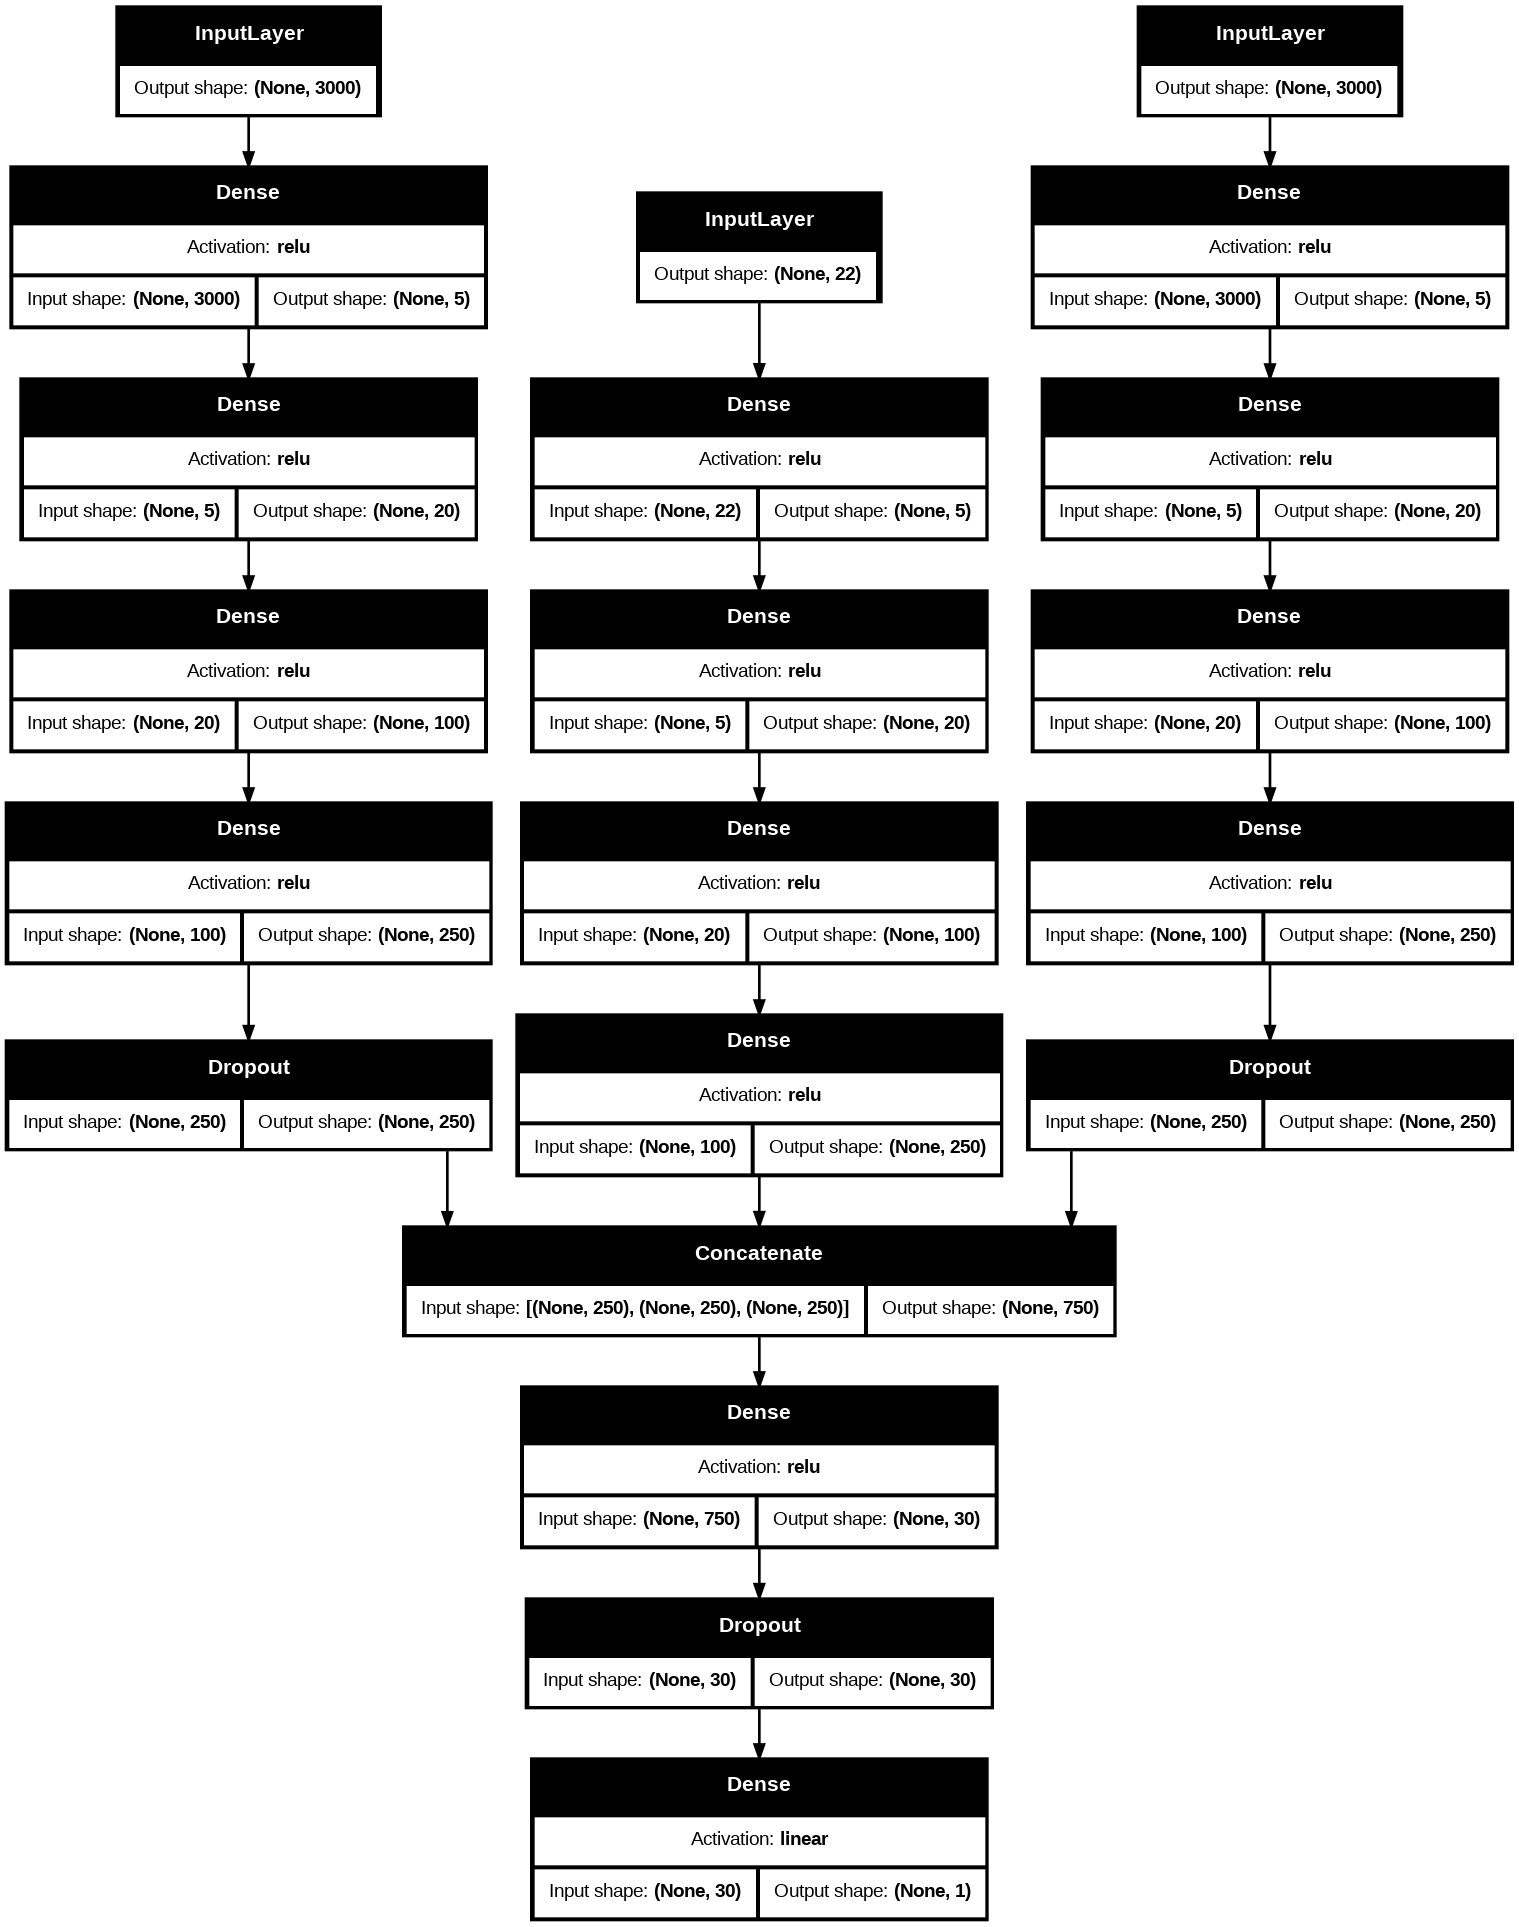

In [ ]:
#Построение схемы модели
utils.plot_model(model, dpi=96, show_shapes=True, show_layer_activations=True)

In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-5), loss='mse', metrics=['mae'])

history = model.fit([x_train[:500], x_train_mark[:500], x_train_model[:500]],
                           y_train_scaled[:500],
                           batch_size=256,
                           epochs=300,
                           validation_data=([x_train[500:], x_train_mark[500:], x_train_model[500:]], y_train_scaled[500:]),
                           verbose=1)

Epoch 1/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 513ms/step - loss: 2.4593 - mae: 1.5019 - val_loss: 0.6017 - val_mae: 0.6586
Epoch 2/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 2.4788 - mae: 1.5061 - val_loss: 0.6022 - val_mae: 0.6588
Epoch 3/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 2.4244 - mae: 1.4891 - val_loss: 0.6028 - val_mae: 0.6591
Epoch 4/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - loss: 2.4787 - mae: 1.5064 - val_loss: 0.6033 - val_mae: 0.6593
Epoch 5/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 2.4462 - mae: 1.4963 - val_loss: 0.6038 - val_mae: 0.6596
Epoch 6/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 2.4351 - mae: 1.4921 - val_loss: 0.6043 - val_mae: 0.6598
Epoch 7/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - loss: 2.4236 - mae: 1.4912 - val_loss: 0.6048 - val_mae: 0.6600
Epoch 8/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - loss: 2.4330 - mae: 1.4931 - val_loss: 0.6054 - val_mae: 0.6603
Epoch 9/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step - loss: 2.471

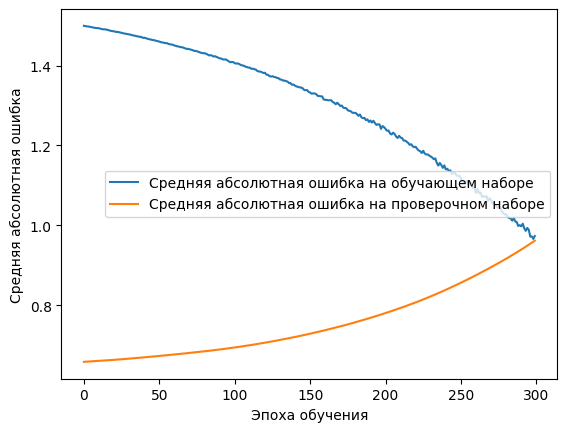

In [ ]:
plt.plot(history.history['mae'], label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'], label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Средняя абсолютная ошибка: 55.522227172851565 

Реальное значение: 747.00  Предсказанное значение: 846.05  Разница:  99.05
Реальное значение: 747.00  Предсказанное значение: 793.86  Разница:  46.86
Реальное значение: 747.00  Предсказанное значение: 850.41  Разница: 103.41
Реальное значение: 747.00  Предсказанное значение: 832.95  Разница:  85.95
Реальное значение: 747.00  Предсказанное значение: 851.50  Разница: 104.50
Реальное значение: 747.00  Предсказанное значение: 792.34  Разница:  45.34
Реальное значение: 747.00  Предсказанное значение: 844.25  Разница:  97.25
Реальное значение: 747.00  Предсказанное значение: 840.78  Разница:  93.78
Реальное значение: 747.00  Предсказанное значение: 840.78  Разница:  93.78
Реальное значение: 750.00  Предсказанное значение: 819.82  Разница:  69.82
Реальное значение: 750.00  Предсказанное значение: 847.85  Разница:  97.85
Реальное значение: 750.00  Предсказанное значение: 844.25  Разница:  94.25
Реальное зна

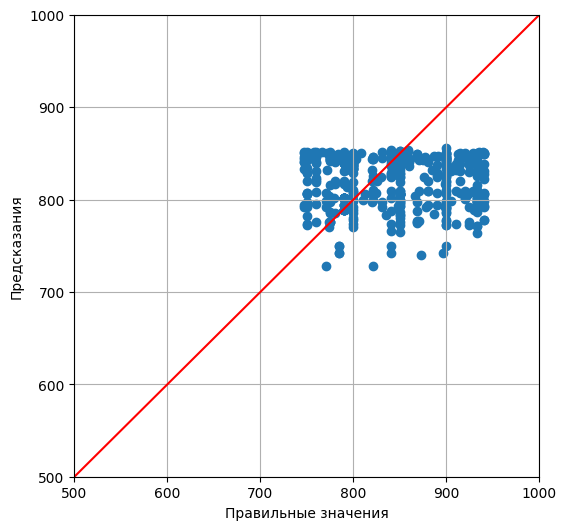

In [ ]:
pred = model.predict([x_train[500:1000], x_train_mark[500:1000], x_train_model[500:1000]])

pred = y_scaler.inverse_transform(pred)    # Обратная нормированию процедура

print('Средняя абсолютная ошибка:', mean_absolute_error(pred, y_train[500:1000]), '\n') # расчет средней абсолютной ошибки

for i in range(20):
    print('Реальное значение: {:6.2f}  Предсказанное значение: {:6.2f}  Разница: {:6.2f}'.format(y_train[500:1000][i, 0],
                                                                                                pred[i, 0],
                                                                                                abs(y_train[500:1000][i, 0] - pred[i, 0])))
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(y_train[500:1000], pred)          # Отрисовка точечного графика
ax.set_xlim(500, 1000)                           # Ограничение оси по x
ax.set_ylim(500, 1000)                           # Ограничение оси по x
ax.plot(plt.xlim(), plt.ylim(), 'r')          # Отрисовка диагональной линии
plt.xlabel('Правильные значения')
plt.ylabel('Предсказания')
plt.grid()
plt.show()